# Emotion Detection


# Importing Libraries

In [3]:
# import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.15.0


# Exploring Dataset


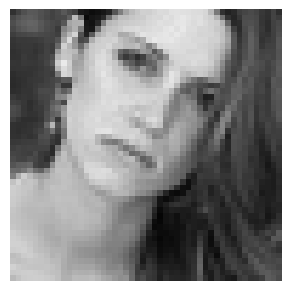

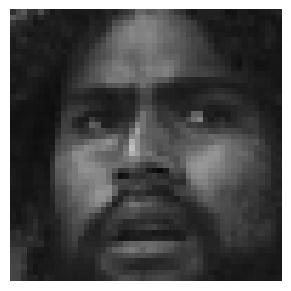

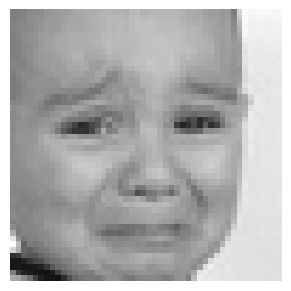

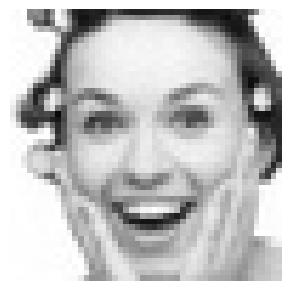

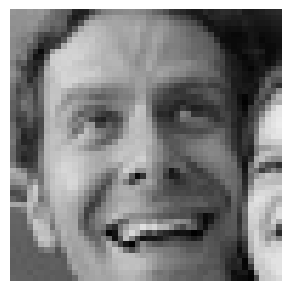

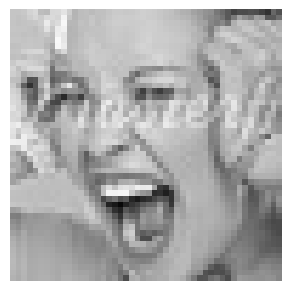

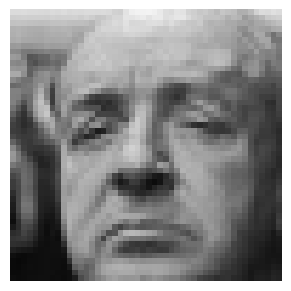

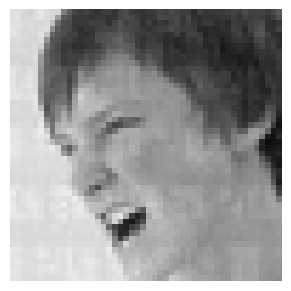

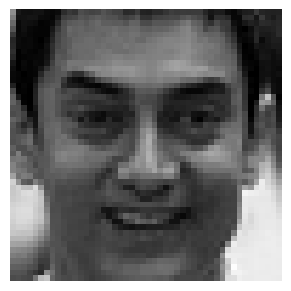

In [70]:
from matplotlib import pyplot as plt
images = glob("/Users/niketanabhagat/Desktop/EmotionDetection/train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

# preparing data for training

In [44]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("/Users/niketanabhagat/Desktop/EmotionDetection/train",
                                             target_size = (img_size,img_size),
                                             color_mode = "grayscale",
                                             batch_size = batch_size,
                                             class_mode = "categorical",
                                             shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("/Users/niketanabhagat/Desktop/EmotionDetection/test",
                                             target_size = (img_size,img_size),
                                             color_mode = "grayscale",
                                             batch_size = batch_size,
                                             class_mode = "categorical",
                                             shuffle = True)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Defining model

In [28]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size=kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0,25)(x)

In [29]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0,25)(x)

In [50]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Conv2D(32, (3, 3))(inputs)
    conv_2 = Conv2D(64, (5, 5))(inputs)
    conv_3 = Conv2D(12, (3, 3))(inputs)
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense(256)(flatten)
    
    output = Dense(7,activation ="softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    
    return model

In [51]:
model = model_fer((48,48,1))
model.summary() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 46, 46, 12)        120       
                                                                 
 flatten_5 (Flatten)         (None, 25392)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6500608   
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 6502527 (24.81 MB)
Trainable params: 6502527 (24.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Initilizing the model

In [63]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor ='val_accuracy', save_weight_only = True, mode = 'max', verbose =1)
callbacks =[checkpoint]


# Traning the Model

**The next cell takes time to complete** 

In [64]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks
)

Epoch 1/15
447/448 [============================>.] - ETA: 0s - loss: 50.7770 - accuracy: 0.2948
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 25s 56ms/step - loss: 50.7511 - accuracy: 0.2949 - val_loss: 46.8019 - val_accuracy: 0.2695
Epoch 2/15
447/448 [============================>.] - ETA: 0s - loss: 33.5561 - accuracy: 0.2982
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 25s 55ms/step - loss: 33.5588 - accuracy: 0.2982 - val_loss: 32.2405 - val_accuracy: 0.2658
Epoch 3/15
447/448 [============================>.] - ETA: 0s - loss: 22.7086 - accuracy: 0.2981
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 22s 48ms/step - loss: 22.6921 - accuracy: 0.2981 - val_loss: 21.5999 - val_accuracy: 0.2578
Epoch 4/15
447/448 [============================>.] - ETA: 0s - loss: 15.8300 - accuracy: 0.3009
Epoch 4: saving model to model_weights.h5
448/448 [==============================

**Model Evaluation**

In [65]:
model.evaluate(validation_generator)

113/113 [==============================] - 2s 16ms/step - loss: 1.8194 - accuracy: 0.3068


[1.8193657398223877, 0.3067706823348999]

**Plotting loss**


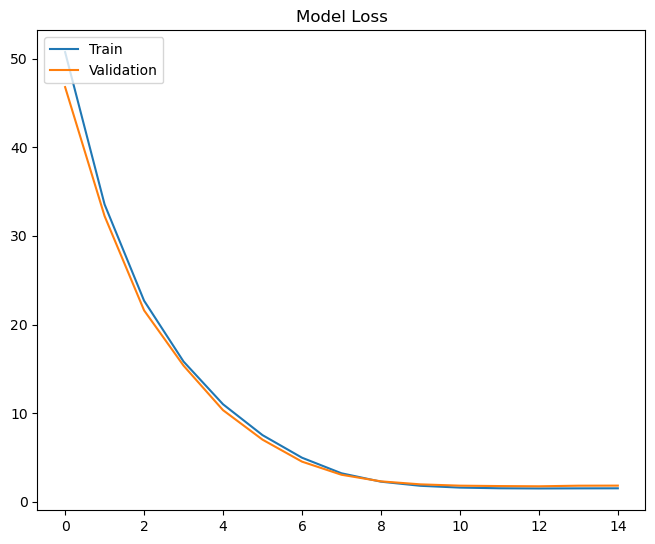

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

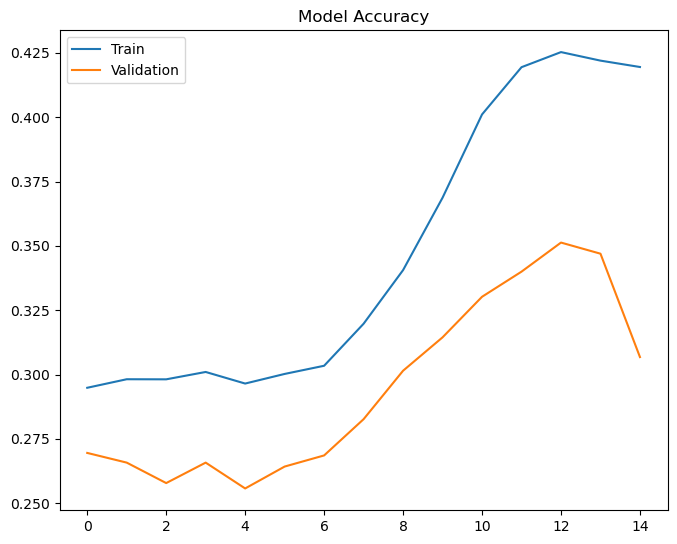

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

**model saving**

In [69]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)